## init

In [1]:
import sys 
sys.path.append('pyfiles/')
import classes_loop as cl
# so we don't have to reboot kernel every time we modify classes.py
%load_ext autoreload
%autoreload 2

# math stuff
import numpy as np
# visualization
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import distance
from copy import deepcopy

import matplotlib.pyplot as plt
%matplotlib inline
# sliders
from ipywidgets import interactive

# for matrix import and display
import pandas as pd
from IPython.display import display_html 
import csv 
import scipy.sparse
######## NOTE: from this point on, order is important. 
# it would be good to make the code more robust, but right
# now, there are ordered dependencies between functions.

# points = cl.ellipse_example(numpts = 6)
# # note: 100 pts causes handling error

In [2]:
mat = cl.bdmatrix()
print(mat.initmatrix)

# matrix[i][j]
# matrix1 +2 matrix2
# matrix[i][j] = x

[[0 1 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0]
 [0 0 0 1 1 0 0 0]
 [0 0 0 0 1 1 0 0]
 [0 0 0 0 0 1 1 0]
 [0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0]]


1. make 0 matrix from np array
2. edit particular positions to 1
3. reduce matrix 
    - +2 addition
    - identify lowest ones in col
    
    
dictionary where keys are indices (columns), values are sets of row indices with 1s (so max returns lowest one)

In [3]:
# d[11] |= {6}

In [4]:
# d[11].remove(6)
# screams at you if was already 0

In [5]:
# d[11] -= {6}
# doesn't scream at you

In [6]:
{1,2} ^ {2,3}
# symm diff

{1, 3}

simple effective time improvements
1. "inverse of low func" eats row indices and spits out col inds, so you get col that has input row as lowest one; e.g. func(5)=7 menas that the 7th column has the lowest one in the 5th row. this eliminates loop of columns from start to my column. n^4 -> n^3
Do just this in what I already have to see speedup
Note: you can separately remember birth simplices so you have essential classes at the end

2. clearing: work within dimension right to left, but inside a dimension, from top dim to bottom dim. if you find a death col, you automatically found a birth col for free, so you can set brth col to 0s. 

In [7]:
d = {7 : 5}

In [8]:
# you can tell it what to tell you if not there, ie -1
d.get(7, -1)

5

In [9]:
def array2sparse(matrix):
#     we're going to make a better repr of a matrix. 
#     we'll have a dictionary, like this:
#     d = {
#     c : {r1, r2, r3},
#     }
#     where column:row indicates the location of a 1 in the matrix.
#     this way we don't store zeros, and computation will be faster. 
    sparseboii = {}
    height = len(matrix[:][0])
    width = len(matrix[0][:])
    for col_j in range(width):
        for row_i in range(height):
            if matrix[row_i][col_j] == 1:
                if col_j not in sparseboii.keys():
                    # initialize set 
                    sparseboii[col_j] = set()
                sparseboii[col_j].add(row_i)
    return sparseboii

def findlowestone(sparsemat, col_num):
    # a fast way to find the lowest one 
    # in a column in a sparse dict repr of
    # a boundary matrix
    # returns row num of lowest one
    return max(sparsemat[col_num])
    
matrix = np.array([\
     [0,1,0,0,0,0,0,0],\
     [0,1,1,0,0,0,0,0],\
     [0,0,1,1,0,0,0,0],\
     [0,0,0,1,1,0,0,0],\
     [0,0,0,0,1,1,0,0],\
     [0,0,0,0,0,1,1,0],\
     [0,0,0,0,0,0,1,1],\
     [0,0,0,0,0,0,0,0]])
sparse = array2sparse(matrix)
print(sparse)
findlowestone(sparse, 5)

{1: {0, 1}, 2: {1, 2}, 3: {2, 3}, 4: {3, 4}, 5: {4, 5}, 6: {5, 6}, 7: {6}}


5

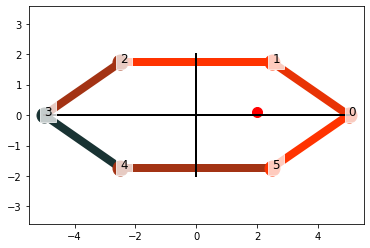

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0,1,1,1,0,0,1,0,1,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,1,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,1,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [16]:
points = cl.ellipse_example(numpts = 6)
init_complex = cl.initcomplex(points)
s_complex = cl.complex()
s_complex.key_point = (2,0.1)
distlist = s_complex.find_sq_dist(init_complex)
cl.sort_complex(s_complex, distlist, plot = True)
all_simplices = s_complex.order_all_simps()
mat = cl.bdmatrix()
mat.make_matrix(s_complex)

mat.reduce()

In [28]:
mat.smartreduce()

{1: {0}, 2: {0}, 3: {0}, 4: {1, 3}, 5: {2, 3}, 6: {0}, 7: {1, 6}, 8: {0}, 9: {8, 2}, 10: {0}, 11: {10, 6}, 12: {8, 10}}
we got to col nm 1 which is {0}
we got to col nm 2 which is {0}
we got to col nm 3 which is {0}
we got to col nm 4 which is {1, 3}
we got to col nm 5 which is {2, 3}
we got to col nm 6 which is {0}
we got to col nm 7 which is {1, 6}
we got to col nm 8 which is {0}
we got to col nm 9 which is {8, 2}
we got to col nm 10 which is {0}
we got to col nm 11 which is {10, 6}
we got to col nm 12 which is {8, 10}

 {1: {0}, 4: {1, 3}, 5: {1, 2}, 7: {1, 6}, 9: {8, 2}, 11: {10, 6}}
